# AIDI 2000 -  Applied Machine Learning
## Assignment #1
### Submitted By: Batool Talha
### Submission Date: June 16, 2024

### Prepare Problem

In [36]:
# Load Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Load the Titanic dataset
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Summarize Data/ Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


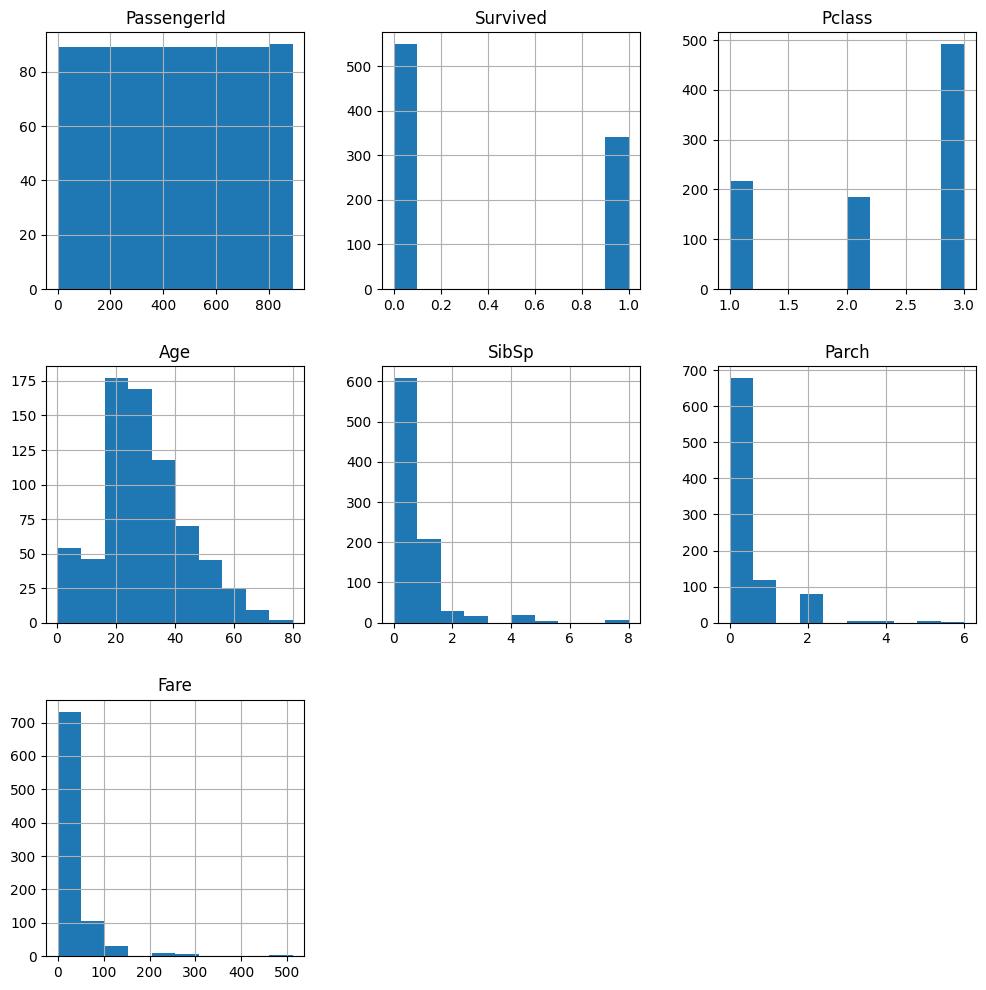

In [9]:
df.hist(figsize=(12, 12))
plt.show()

In [18]:
# Feature <Cabin> has missing data. Furthermore, it has categorial data.
# This feature does not look relevant also in predicting the survival of 
# passengers. For this reason, instead of filling out the missing data,
# removing this data from the dataset
df= df.drop(labels='Cabin', axis='columns')

In [19]:
# Feature <Name> is categorial data.
# This feature does not look relevant in predicting the survival of 
# passengers. Therefore, removing this data from the dataset
df= df.drop(labels='Name', axis='columns')

In [14]:
# Feature <Age> has missing data. Filling out the missing data for <Age>
df['Age']= df['Age'].fillna(df['Age'].mean())

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [26]:
# Encoding features <Sex> & <Embarked> to convert them from categorical data to numerical data

# Instantiating the label encoder
label_encoder = LabelEncoder()

# Encoding features <Sex> & <Embarked>
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [27]:
# Feature <Ticket> is categorial data.
# This feature does not look relevant in predicting the survival of 
# passengers. Therefore, removing this data from the dataset
df= df.drop(labels='Ticket', axis='columns')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [32]:
columns_titles = ["Survived", "PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df=df.reindex(columns=columns_titles)
df.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,3,1,22.0,1,0,7.2500,2
1,1,2,1,0,38.0,1,0,71.2833,0
2,1,3,3,0,26.0,0,0,7.9250,2
3,1,4,1,0,35.0,1,0,53.1000,2
4,0,5,3,1,35.0,0,0,8.0500,2


In [33]:
# Calculate the correlation matrix for the dataset
df.corr()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.005007,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
PassengerId,-0.005007,1.000000,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Pclass,-0.338481,-0.035144,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.042939,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,0.033207,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,-0.057527,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,-0.001652,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,0.012658,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.013083,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


<Axes: >

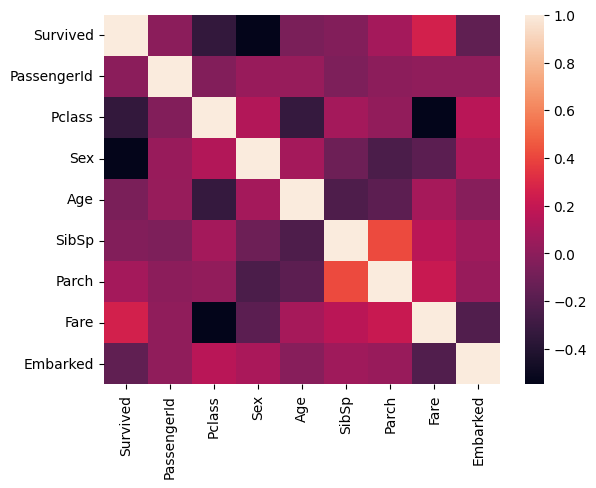

In [34]:
#Visualization of Correlations
# fig = plt.figure(figsize=(10,5))
# sns.heatmap(df.corr(),annot=True,cmap="Blues")
sns.heatmap(df.corr())

### Prepare Data

<Axes: >

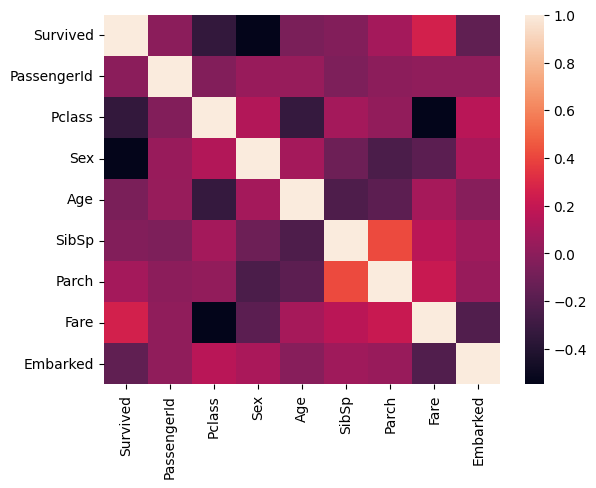

In [35]:
# Calculate the correlation matrix for the dataset
data_corr = df.corr()
#Visualization of Correlations
sns.heatmap(data_corr)

In [38]:
# Split the dataset into input (X) and output (y) attributed
X = df.drop(columns = ['Survived'])
y = df['Survived']

### Model Building and Evaluate Algorithm 
#### ML Model #1 - Random Forest Classifier

In [39]:
# Split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Determine the number of input features
n_features = X_train.shape[1]
print(n_features)

(623, 8) (268, 8) (623,) (268,)
8


In [40]:
# Initialize the instance of Random Forest Classifier
rf_clf = RandomForestClassifier()
# Use all the defaults of the model as set in sci-kit learn
# RandomForestRegressor(n_estimators=100, *, criterion='gini', 
#                       max_depth=None, min_samples_split=2, 
#                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                       max_features='sqrt', max_leaf_nodes=None, 
#                       min_impurity_decrease=0.0, bootstrap=True, 
#                       oob_score=False, n_jobs=None, random_state=None, 
#                       verbose=0, warm_start=False, class_weight=None, 
#                       ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
# Fit the training data to the random foreat model
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = rf_clf.predict(X_train)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_train, y_pred_train)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

Mean Absolute Error: 30001.91
Mean Squared Error: 3187567151.20
Root Mean Squared Error: 56458.54


In [73]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = rf_reg.predict(X_test)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_test, y_pred_test)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Mean Absolute Error: 79556.36
Mean Squared Error: 21527546202.42
Root Mean Squared Error: 146722.68


Performance metrics show that the model is behaving good for the training dataset but it is performing poorly on the test data. 
This shows model overfitting. There is a need to tune model hyperparameters to reduce the overfitting.

### Improve Accuracy
#### ML Model #1 - Random Forest Regressor

In [74]:
# Optimize the hyperparameters of the model to improve accurary
parameters = {'n_estimators': [120, 125, 130], 
             'max_depth': [16, 18, 22],
              'max_features': [9, 10, 11],
              'max_leaf_nodes': [84, 86, 88]
             }
rf_reg_opt = RandomForestRegressor()
rf_reg_opt = GridSearchCV(rf_reg_opt, parameters)
# Fit the training data to the random foreat model
rf_reg_opt.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [16, 18, 22], 'max_features': [9, 10, 11],
                         'max_leaf_nodes': [84, 86, 88],
                         'n_estimators': [120, 125, 130]})

In [75]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = rf_reg_opt.predict(X_train)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_train, y_pred_train)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

Mean Absolute Error: 84013.69
Mean Squared Error: 16443568934.34
Root Mean Squared Error: 128232.48


In [76]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = rf_reg_opt.predict(X_test)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_test, y_pred_test)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Mean Absolute Error: 91589.35
Mean Squared Error: 25199047172.80
Root Mean Squared Error: 158742.08


Tuning the model hyperparameters has improved the performance of the model.

### Model Building and Evaluate Algorithm 
#### ML Model #2 - Decision Tree Regressor

In [74]:
# Initialize the instance of Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
# Use all the defaults of the model as set in sci-kit learn
# DecisionTreeRegressor(criterion='squared_error', 
#                       splitter='best', max_depth=None, 
#                       min_samples_split=2, min_samples_leaf=1, 
#                       min_weight_fraction_leaf=0.0, max_features=None, 
#                       random_state=None, max_leaf_nodes=None, 
#                       min_impurity_decrease=0.0, ccp_alpha=0.0, 
#                       monotonic_cst=None)
# Fit the training data to the random foreat model
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = dt_reg.predict(X_train)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_train, y_pred_train)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

Mean Absolute Error: 819.55
Mean Squared Error: 86750767.14
Root Mean Squared Error: 9314.01


In [76]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = dt_reg.predict(X_test)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_test, y_pred_test)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Mean Absolute Error: 110008.90
Mean Squared Error: 46459998681.44
Root Mean Squared Error: 215545.82


Performance metrics show that the model is behaving good for the training dataset but it is performing poorly on the test data. 
This shows model overfitting. There is a need to tune model hyperparameters to reduce the overfitting.

### Improve Accuracy
#### ML Model 2 - Decision Tree Regressor

In [77]:
# Optimize the hyperparameters of the model to improve accurary
parameters = {'max_depth': [6, 7, 8, 9, 10, 12], 
              'max_leaf_nodes': [36, 40, 44, 48, 50, 52],
              'max_features': [10, 12, 14, 16, 18]}
dt_reg_opt = DecisionTreeRegressor()
dt_reg_opt = GridSearchCV(dt_reg_opt, parameters)
# Fit the training data to the random foreat model
dt_reg_opt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 7, 8, 9, 10, 12],
                         'max_features': [10, 12, 14, 16, 18],
                         'max_leaf_nodes': [36, 40, 44, 48, 50, 52]})

In [ ]:
dt_reg_opt.best_params_

In [39]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = dt_reg_opt.predict(X_train)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_train, y_pred_train)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

Mean Absolute Error: 30220.15
Mean Squared Error: 3194893829.82
Root Mean Squared Error: 56523.39


In [73]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = dt_reg_opt.predict(X_test)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_test, y_pred_test)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Mean Absolute Error: 115668.43
Mean Squared Error: 41316663174.56
Root Mean Squared Error: 203265.01


Tuning the model hyperparameters has improved the performance of the model. However, the model needs more optimization.

### Model Building and Evaluate Algorithm 
#### ML Model #3 - Multiple Linear Regressor

In [77]:
# Initialize the instance of Multiple Linear Regressor
mult_linear_reg = LinearRegression()
# Use all the defaults of the model as set in sci-kit learn
# LinearRegression(fit_intercept=True, copy_X=True, 
#                  n_jobs=None, positive=False)
# Fit the training data to the random foreat model
mult_linear_reg.fit(X_train, y_train)

LinearRegression()

In [78]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = mult_linear_reg.predict(X_train)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_train, y_pred_train)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

Mean Absolute Error: 126189.99
Mean Squared Error: 40925020393.45
Root Mean Squared Error: 202299.33


In [79]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = mult_linear_reg.predict(X_test)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_test, y_pred_test)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

Mean Absolute Error: 128664.32
Mean Squared Error: 43080626089.75
Root Mean Squared Error: 207558.73


### Model Building and Evaluate Algorithm 
#### ML Model #4 - Neural Networks Regressor

In [80]:
#Step-1 Define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
#Step-2 Compile the model
model.compile(optimizer='adam', loss='mse')
#Step-3 Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
#Step-4 Evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))
#Step-5 Make a prediction
row = np.array([[0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,23.23,0.734]])
#yhat = model.predict([row])
yhat = model.predict([row])[0][0]
print('Predicted: %.3f' % yhat)

C:\Users\batoo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE: 65688629248.000, RMSE: 256297.931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted: 149086.438


### Model Building and Evaluate Algorithm 
#### ML Model #5 - Gradient Boost Regressor

In [81]:
# Initialize the instance of Gradient Boost Regressor
gb_reg = GradientBoostingRegressor()
# Use all the defaults of the model as set in sci-kit learn
# GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, 
#                           n_estimators=100, subsample=1.0, criterion='friedman_mse', 
#                           min_samples_split=2, min_samples_leaf=1, 
#                           min_weight_fraction_leaf=0.0, max_depth=3, 
#                           min_impurity_decrease=0.0, init=None, 
#                           random_state=None, max_features=None, alpha=0.9, 
#                           verbose=0, max_leaf_nodes=None, warm_start=False, 
#                           validation_fraction=0.1, n_iter_no_change=None, 
#                           tol=0.0001, ccp_alpha=0.0)
# Fit the training data to the random foreat model
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [82]:
# Predict the output using the training data using the created/ fitted model
y_pred_train = gb_reg.predict(X_train)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_train, y_pred_train)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 

Mean Absolute Error: 81527.27
Mean Squared Error: 17019576368.98
Root Mean Squared Error: 130459.10


In [83]:
# Predict the output using the test data using the created/ fitted model
y_pred_test = gb_reg.predict(X_test)
# Calculate the performance metrics like mean absolute error, mean squared error, root mean squared error
# mean_absolute_error(y_test, y_pred_test)
#Print MSE and RMSE
print('Mean Absolute Error: {:.2f}'.format(mean_absolute_error(y_test, y_pred_test)))
print('Mean Squared Error: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))

Mean Absolute Error: 86792.21
Mean Squared Error: 22766955472.58
Root Mean Squared Error: 150887.23
